# Task 06 - Logistic regression
## Pattern Recognition and Machine Learning

In [1]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from logreg import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### load data

In [2]:
data = np.load("data_logreg.npz", allow_pickle=True)
tst = data["tst"].item()
trn = data["trn"].item()

## Classification of letters A and C
#### compute features

In [3]:
# prepare training data
raise NotImplementedError("You have to implement the rest.")
train_X = None

#### Training - gradient descent of the logistic loss function

In [4]:
# Start at a fixed point:
w_init = np.array([-7, -8], dtype=np.float64)
# or start at a random point:
# w_init = 20 * (rand(size(train_X, 1), 1) - 0.5)
epsilon = 1e-2
[w, wt, Et] = logistic_loss_gradient_descent(train_X, trn['labels'], w_init, epsilon)

Gradient descent iteration #1, logistic loss: 7.743339
Gradient descent iteration #2, logistic loss: 6.507483
Gradient descent iteration #3, logistic loss: 4.148796
Gradient descent iteration #4, logistic loss: 0.462304
Gradient descent iteration #5, logistic loss: 0.310110
Gradient descent iteration #6, logistic loss: 0.301379
Gradient descent iteration #7, logistic loss: 0.261992
Gradient descent iteration #8, logistic loss: 0.260078
Gradient descent iteration #9, logistic loss: 0.258934
Gradient descent iteration #10, logistic loss: 0.258469
Gradient descent iteration #11, logistic loss: 0.258207
Gradient descent iteration #12, logistic loss: 0.258073
Gradient descent iteration #13, logistic loss: 0.257999
Gradient descent iteration #14, logistic loss: 0.257959
Gradient descent iteration #15, logistic loss: 0.257938
Gradient descent iteration #16, logistic loss: 0.257926
Gradient descent iteration #17, logistic loss: 0.257920
Gradient descent iteration #18, logistic loss: 0.257916
G

#### Plot the progress of the gradient descent

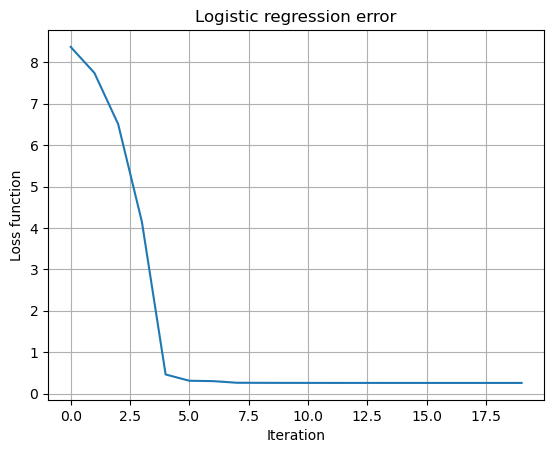

In [5]:
raise NotImplementedError("You have to implement the rest.")
plt.savefig('E_progress_AC.png')

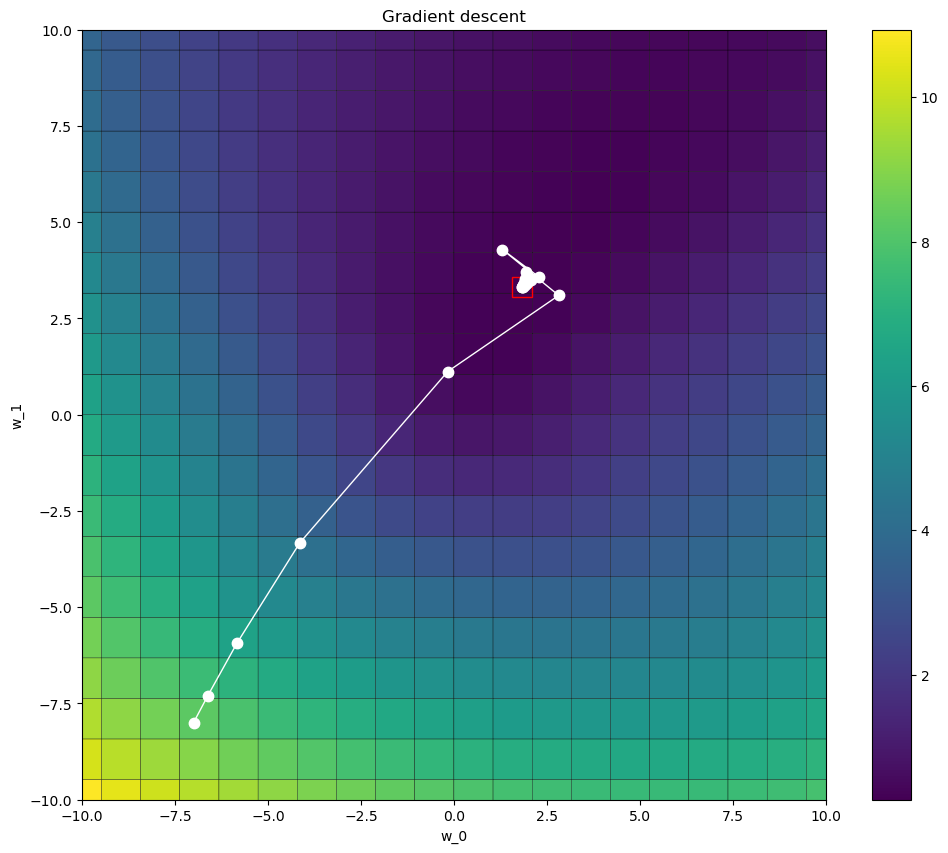

In [6]:
# you can change this:
plot_gradient_descent(train_X, trn['labels'], logistic_loss, w, wt, Et)
plt.savefig('w_progress_2d_AC.png')

In [7]:
thr = get_threshold(np.array([1.5, -0.7]))
print(thr)

2.142857142857143


In [8]:
# Load test letter data
raise NotImplementedError("You have to implement the rest.")
testX = None

# Classify letter test data and calculate classification error
classifiedLabels = classify_images(testX, w)
raise NotImplementedError("You have to implement the rest.")
errors = None
testError = np.sum(errors, dtype=np.float64) / errors.size
print('Letter classification error: {:.2f}%'.format(testError * 100))

Letter classification error: 7.00%


#### Visualize classification results

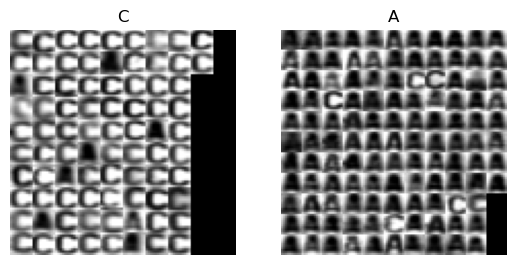

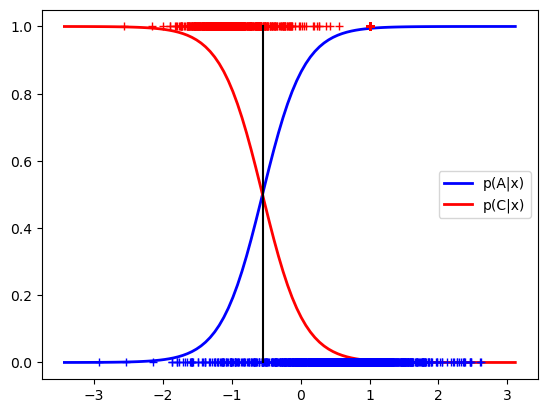

In [9]:
show_classification(tst['images'], classifiedLabels, 'CA')
plt.savefig('classif_AC.png')

# show the aposteriori probabilities
plot_aposteriori(train_X, trn['labels'], w)
plt.savefig('aposteriori.png')

## Classification of MNIST digits
#### init

In [10]:
# Load training data
data = np.load("mnist_trn.npz", allow_pickle=True)
X, y, imsize = data["X"], data["y"], data["imsize"]

In [11]:
# Add x0 = 1 (for the bias term)
raise NotImplementedError("You have to implement the rest.")
X = None
# Training - gradient descent of the logistic loss function

np.random.seed(1) # to get the same example outputs
w_init = np.random.rand(X.shape[0])
epsilon = 1e-2

In [12]:
w, _, Et = logistic_loss_gradient_descent(X, y, w_init, epsilon)

Gradient descent iteration #1, logistic loss: 0.500160
Gradient descent iteration #2, logistic loss: 0.300793
Gradient descent iteration #3, logistic loss: 0.234830
Gradient descent iteration #4, logistic loss: 0.148581
Gradient descent iteration #5, logistic loss: 0.070182
Gradient descent iteration #6, logistic loss: 0.016134
Gradient descent iteration #7, logistic loss: 0.010176
Gradient descent iteration #8, logistic loss: 0.000393
Gradient descent iteration #9, logistic loss: 0.000007
Gradient descent iteration #10, logistic loss: 0.000006


#### visualise

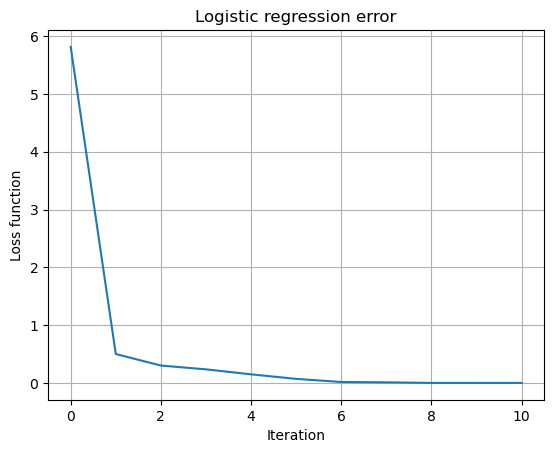

In [13]:
# Plot the progress of the gradient descent
raise NotImplementedError("You have to implement the rest.")
plt.savefig('E_progress_MNIST.png')

## Classify MNIST test data and calculate classification error
#### init

In [14]:
# Load test data
data = np.load("mnist_tst.npz", allow_pickle=True)
X, y, imsize = data["X"], data["y"], data["imsize"]

raise NotImplementedError("You have to implement the rest.")
X = None

In [15]:
# Classify MNIST test data and calculate classification error
classifiedLabels = classify_images(X, w)
errors = np.abs(classifiedLabels - y) > 0
testError = np.sum(errors, dtype=np.float64) / errors.size
print('MNIST digit classification error: {:.2f}%'.format(testError * 100))

MNIST digit classification error: 0.10%


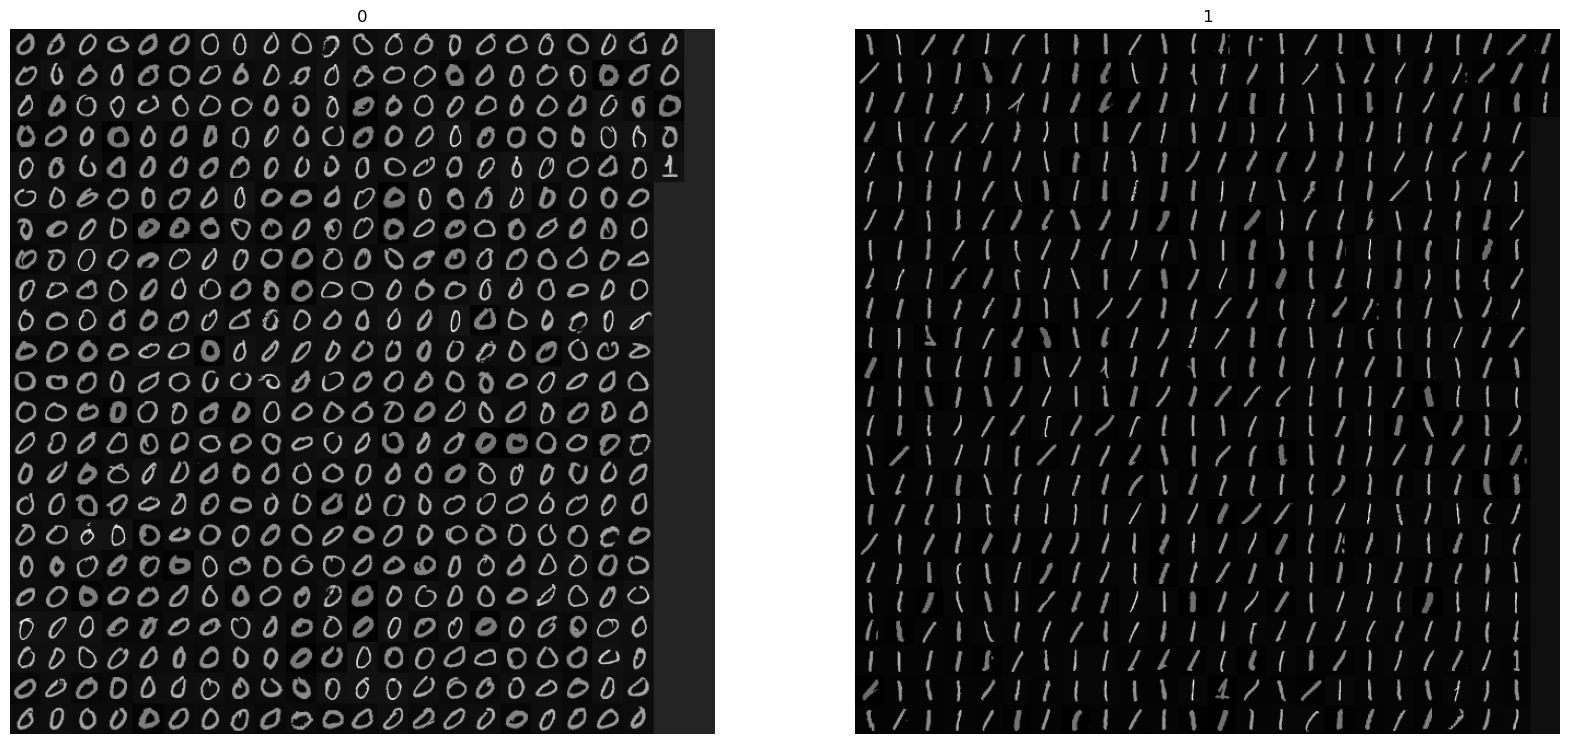

In [16]:
# Visualize classification results
show_mnist_classification(X[1:, :], classifiedLabels, imsize)
plt.savefig('classif_MNIST.png')

Because of our choice of image features, we now have a weight for each pixel (+ 1 bias term), allowing the following visualization. We can now intuitively explain how the decisions are made.

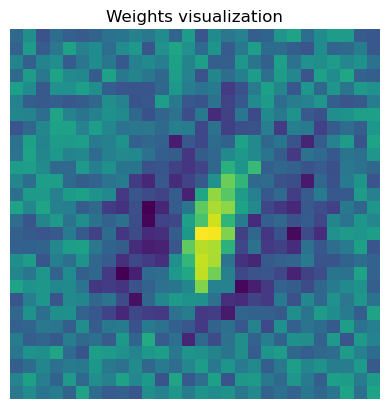

In [17]:
w_img = w[:-1].reshape(imsize)
plt.imshow(w_img)
plt.axis('off')
plt.title('Weights visualization')
plt.savefig('weight_image.png')